# Árbol Binario de Búsqueda Óptimo

Dado un arreglo ordenado keys[0.. n-1] de llaves de búsqueda y un arreglo freq[0.. n-1] de frecuencia de conteos, donde freq[i] es el número de búsquedas para keys[i], se debe construir un árbol binario de búsqueda de todas las keys de tal manera que el costo de cada búsqueda sea el menor posible.

El costo de un nodo del BST es el nivel de dicho nodo multiplicado por su frecuencia. El nivel del nodo raíz es 1.

**Entrada**: arreglo key[0.. n-1], freq[0.. n-1] y el número de nodos $n$.

**Salida**: valor de la búsqueda minimizado.

La función que define la optimización está dada por la siguiente fórmula:

$optCost(i,j) = \sum\limits_{k=i}^{j}freq[k]+min_{r=i}^{j} \left[optCost(i, r-1)+optCost(r+1, j)\right]$

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import sys

In [2]:
class Node:
    def __init__(self, key, freq):
        self.key = key
        self.freq = freq

    def __str__(self):
        """
        >>> str(Node(1, 2))
        'Node(key=1, freq=2)'
        """
        return f"Node(key={self.key}, freq={self.freq})"

In [3]:
def print_binary_search_tree(root, key, i, j, parent, is_left, G):
    if i > j or i < 0 or j > len(root) - 1:
        return

    node = root[i][j]
    if parent == -1:  # root does not have a parent
        #print(f"{key[node]} is the root of the binary search tree.")
        if key[node] not in G.nodes:
            G.add_node(key[node])   
    elif is_left:
        #print(f"{key[node]} is the left child of key {parent}.")
        if key[node] not in G.nodes:
            G.add_node(key[node])
            G.add_edge(parent, key[node])
    else:
        #print(f"{key[node]} is the right child of key {parent}.")
        if key[node] not in G.nodes:
            G.add_node(key[node])
            G.add_edge(parent, key[node])

    print_binary_search_tree(root, key, i, node - 1, key[node], True, G)
    print_binary_search_tree(root, key, node + 1, j, key[node], False, G)

In [4]:
def summ(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

# 1. Árbol Binario de Búsqueda Óptimo recursivo

In [5]:
def optimalSearchTreeRec(freq, i, j, verbose=False):
    # Sin elementos
    if j < i:
        return 0
    # Único elemento
    if j == i:
        return freq[i]

    # Get sum of freq[i], freq[i+1], ... freq[j]
    fsum = summ(freq, i, j)
    if verbose:
        print(f'Suma: {fsum}')

    # Initialize minimum value
    Min = float("inf")

    for r in range(i, j + 1):
        cost = (optimalSearchTreeRec(freq, i, r - 1, verbose) +
                optimalSearchTreeRec(freq, r + 1, j, verbose))
        if verbose:
            print(f'cost: {cost}')
        if cost < Min:
            Min = cost
        if verbose:
            print(f'Costo mínimo: {Min+fsum}')

    # Return minimum value
    return Min + fsum

## 1.1. Descripción del algorimo

Este algoritmo recibe el arreglo freq y la primera y última posición del arreglo keys. Primero compara si el arreglo tiene 0 o 1 elemento; en caso contrario, calcula la suma de todos los elementos entre las posiciones entregadas como input. Luego calcula el costo de los subarreglos izquierdo y derecho y almacena el mínimo entre ellos recursivamente. Finalmente retorna el valor mínimo más la suma del rango calculado antes del ciclo recursivo.

In [6]:
keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)
print("Cost of Optimal BST is", optimalSearchTreeRec(freq, 0, len(keys)-1))

Cost of Optimal BST is 142


In [7]:
keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)
print("Cost of Optimal BST is", optimalSearchTreeRec(freq, 0, len(keys)-1, True))

Suma: 92
Suma: 58
cost: 50
Costo mínimo: 108
cost: 8
Costo mínimo: 66
cost: 66
Costo mínimo: 158
cost: 84
Costo mínimo: 158
Suma: 42
cost: 8
Costo mínimo: 50
cost: 34
Costo mínimo: 50
cost: 50
Costo mínimo: 142
Cost of Optimal BST is 142


# 2. Árbol Binario de Búsqueda Óptimo bottom-up

In [8]:
def optimalSearchTreeDin(nodes, visualize=False, verbose=False, graphic=False):
    nodes.sort(key=lambda node: node.key)

    n = len(nodes)

    keys = [nodes[i].key for i in range(n)]
    freqs = [nodes[i].freq for i in range(n)]

    dp = [[freqs[i] if i == j else 0 for j in range(n)] for i in range(n)]
    sum = [[freqs[i] if i == j else 0 for j in range(n)] for i in range(n)]
    root = [[i if i == j else 0 for j in range(n)] for i in range(n)]

    for L in range(2, n + 1):
        if verbose:
            print(f'\nIteración n {L-1}')
        for i in range(n - L + 1):
            j = i + L - 1

            dp[i][j] = sys.maxsize
            sum[i][j] = sum[i][j - 1] + freqs[j]

            # Optimización de Knoth
            for r in range(root[i][j - 1], root[i + 1][j] + 1):  # r is a temporal root
                left = dp[i][r - 1] if r != i else 0  # optimal cost for left subtree
                right = dp[r + 1][j] if r != j else 0  # optimal cost for right subtree
                cost = left + sum[i][j] + right
                if verbose:
                    print(f'cost: {cost}')

                if dp[i][j] > cost:
                    if verbose:
                        print(f'Root: {r}')
                    dp[i][j] = cost
                    root[i][j] = r

    if verbose:
        print("\nBinary search tree nodes:")
        for node in nodes:
            print(node)
        print()

    if not graphic:
        print(f"The cost of optimal BST for given tree nodes is {dp[0][n - 1]}.")
    if visualize:
        G = nx.DiGraph()
        print_binary_search_tree(root, keys, 0, n - 1, -1, False, G)
        nx.draw_networkx(G, with_labels=True, arrows=True)

In [9]:
nodes = [Node(10, 34), Node(12, 8), Node(20, 50)]
optimalSearchTreeDin(nodes)

The cost of optimal BST for given tree nodes is 142.


## 2.1. Descripción del algoritmo

Se definen una matriz de ceros para los costos y se llena con los valores de freq[i]. Por cada posible secuencia de keys contigua y todas las posibles raíces, se computan los subárboles óptimos.


Iteración n 1
cost: 50
Root: 0
cost: 76
cost: 108
Root: 1
cost: 66
Root: 2

Iteración n 2
cost: 158
Root: 0
cost: 176
cost: 142
Root: 2

Binary search tree nodes:
Node(key=10, freq=34)
Node(key=12, freq=8)
Node(key=20, freq=50)

The cost of optimal BST for given tree nodes is 142.


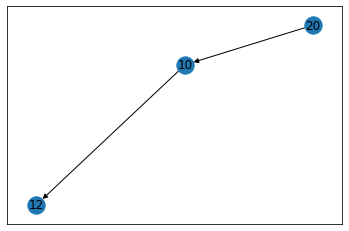

In [10]:
nodes = [Node(10, 34), Node(12, 8), Node(20, 50)]
optimalSearchTreeDin(nodes, True, True)

# 5. Correctitud

Se define la función de recurrencia del algoritmo:

$C'_{ij}=\begin{cases}
    min_{i \leq k \leq j}\{C'_{i, k-1} + C'_{k+1, j}\}+\sum\limits_{l=i}^{j} p_l, & \text{if $i < j$}.\\
    p_i, & \text{if $i = j$}.\\
    0, & \text{if $i > j$}
  \end{cases}$

Se quiere probar que $C'_{ij}$ = $C_{ij}$.

Por inducción, se tiene que el caso base, 0 o 1 coste, es trivial.

$C_{ij} \leq C'_{ij}$: por cálculos previos, se tiene que $C'_{ij}$ es el costo de un BST en $i, ..., j$ y $C_{ij}$ es el óptimo BST.

En el caso $C_{ij} \geq C'_{ij}$, con $k$ raíz del óptimo BST supuesto, 

\begin{align*}
    C_{ij} &= C_{i, k-1} + C_{k+1, j} + \sum\limits_{l=i}^{j} p_l\\
    & \geq C'_{i, k-1} + C'_{k+1, j} + \sum\limits_{l=i}^{j} p_l\\
    & \geq min_{i \leq k \leq j}\{C'_{i, k-1} + C'_{k+1, j}\}+\sum\limits_{l=i}^{j} p_l\\
    & = C'_{ij}
\end{align*}

que corresponde a la función de recurrencia definida arriba, por lo que queda demostrada la correctitud.

# 6. Tiempo de ejecución

## 6.1. Recursivo

Se define la función de recurrencia:

\begin{align*}
    T(n) & = \sum\limits_{i=0}^{n-1} T(i) + n\\
    & \geq T(n-1) + T(n-2)\\
    & \geq F(n), \text{con $F(n)$ la función de Fibonacci}\\
    & = 2^{\Theta(n)}
\end{align*}

Por lo que el tiempo de ejecución sería $2^{\Theta(n)}$.

## 6.2. Bottom-Up

Se puede apreciar en el algoritmo que este posee 3 _for_ anidados, cada uno con valores poribles de hasta n. Así, el tiempo de ejecución que corresponde es $O(n^3)$.

# 7. Experimentos

## 7.1. Tiempo al aumentar n

In [11]:
import datetime
import matplotlib.pyplot as plt
import random
from random import randint
from math import log
from timeit import repeat

%matplotlib inline

In [12]:
def generateNodes(n):
    keys = list()
    freq = list()
    nodesRec = list()
    while len(keys) < n:
        key = randint(1, 99)
        if key not in keys:
            keys.append(key)
    while len(freq) < n:
        freq.append(randint(1, 99))

    for i in range(len(keys)):
        nodesRec.append((keys[i], freq[i]))
    return nodesRec

In [13]:
def generateNodeObjects(n, graphic):
    keys = list()
    freq = list()
    nodes = list()
    while len(keys) < n:
        key = randint(1, 99)
        if key not in keys:
            keys.append(key)
    while len(freq) < n:
        freq.append(randint(1, 99))

    for i in range(len(keys)):
        nodes.append(Node(keys[i], freq[i]))
    return optimalSearchTreeDin(nodes, False, False, graphic)

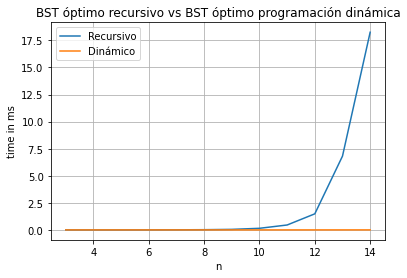

In [14]:
x = []
y = []

x2 = []
y2 = []

for n in range(3,15):
    a = generateNodes(n)
    freq = list()
    for i in range(len(a)):
        freq.append(a[i][1])
    t = repeat(setup="from __main__ import optimalSearchTreeRec, summ", stmt=f'optimalSearchTreeRec({freq}, {0}, {len(a)-1})', repeat=1, number=10)
    x.append(n)
    y.append(t)

for n2 in range(3,15):
    t2 = repeat(setup="from __main__ import Node, sys, optimalSearchTreeDin, generateNodeObjects", stmt=f'generateNodeObjects({n2}, {True})', repeat=1, number=10)
    x2.append(n2)
    y2.append(t2)

plt.plot(x, y)
plt.plot(x2, y2)
plt.legend(["Recursivo", "Dinámico"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("BST óptimo recursivo vs BST óptimo programación dinámica")

plt.grid()
plt.show()

Como se aprecia en el gráfico, se demuestra empíricamente el comportamiento exponencial de la versión recursiva del algoritmo. La versión dinámica resulta mucho más óptima de acuerdo al gráfico resultante.

## 7.2. Tiempo con el nodo de mayor probabilidad como raíz

In [15]:
def orderFreq(nodes):
    sorted_by_second = sorted(nodes, key=lambda tup: tup[1], reverse=True)
    return sorted_by_second

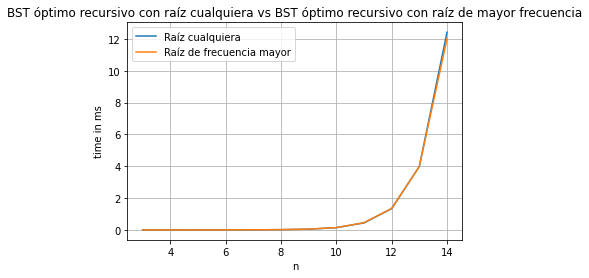

In [16]:
x = []
y = []

x2 = []
y2 = []

for n in range(3,15):
    a = generateNodes(n)
    freq = list()
    for i in range(len(a)):
        freq.append(a[i][1])
    t = repeat(setup="from __main__ import optimalSearchTreeRec, summ", stmt=f'optimalSearchTreeRec({freq}, {0}, {len(a)-1})', repeat=1, number=10)
    x.append(n)
    y.append(t)

for n2 in range(3,15):
    a2 = generateNodes(n2)
    freq = list()
    for i in range(len(a2)):
        freq.append(a2[i][1])
    a2 = orderFreq(a2)
    t2 = repeat(setup="from __main__ import optimalSearchTreeRec, summ", stmt=f'optimalSearchTreeRec({freq}, {0}, {len(a2)-1})', repeat=1, number=10)
    x2.append(n2)
    y2.append(t2)

plt.plot(x, y)
plt.plot(x2, y2)
plt.legend(["Raíz cualquiera", "Raíz de frecuencia mayor"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("BST óptimo recursivo con raíz cualquiera vs BST óptimo recursivo con raíz de mayor frecuencia")

plt.grid()
plt.show()

Se puede notar en el gráfico que modificando el orden de los nodos de tal manera que el nodo raíz sea el de mayor frecuencia no afecta en nada el comportamiento del algoritmo con respecto a no modificar el orden de los nodos. Por lo tanto, con un n grande da lo mismo qué nodo sea la raíz, el comportamiento no varía.

In [17]:
def generateOrderedObjectNodes(n, graphic):
    keys = list()
    freq = list()
    nodes = list()
    while len(keys) < n:
        key = randint(1, 99)
        if key not in keys:
            keys.append(key)
    while len(freq) < n:
        freq.append(randint(1, 99))
    
    freq.sort(reverse=True)

    for i in range(len(keys)):
        nodes.append(Node(keys[i], freq[i]))
    return optimalSearchTreeDin(nodes, False, False, graphic)

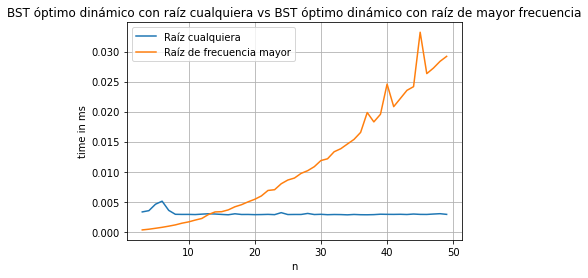

In [18]:
x = []
y = []

x2 = []
y2 = []

# Recomiendo no aumentar el rango, porque el tiempo de ejecución se dispara
# muy rápido (con un rango hasta 50 se estaba demorando más de 1 hora así que
# lo detuve). La versión dinámica es menos compleja, por lo que en el siguiente
# experimento aumento mucho el rango para obtener un mejor gráfico
for n in range(3,50):
    t = repeat(setup="from __main__ import Node, sys, optimalSearchTreeDin, generateNodeObjects", stmt=f'generateNodeObjects({n2}, {True})', repeat=1, number=10)
    x.append(n)
    y.append(t)

for n2 in range(3,50):
    t2 = repeat(setup="from __main__ import Node, sys, optimalSearchTreeDin, generateOrderedObjectNodes", stmt=f'generateOrderedObjectNodes({n2}, {True})', repeat=1, number=10)
    x2.append(n2)
    y2.append(t2)

plt.plot(x, y)
plt.plot(x2, y2)
plt.legend(["Raíz cualquiera", "Raíz de frecuencia mayor"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("BST óptimo dinámico con raíz cualquiera vs BST óptimo dinámico con raíz de mayor frecuencia")

plt.grid()
plt.show()

Del gráfico obtenido se puede deducir que trabajar con un BST en el que el nodo raíz sea el de mayor frecuencia aumenta mucho más el tiempo de ejecución con respecto a que los nodos estén en cualquier orden. Por lo tanto, para un n grande conviene más no tener una raíz como el elemento de mayor frecuencia.